<a href="https://colab.research.google.com/github/tanpharamut/AIprototype2022/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install azure-data-tables

## Azure Table (CloudDB)

1. create DB on Azure Protal
2. Insert Data
3. Query Data

In [29]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [30]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototypetanboy2;AccountKey=rHOcYZTV6hvH4MuFPlfMcVDL7UhkSUS4rUcZh3Z7L/9rB5JFeM95YzbOKjPgEOuSVtjBFC+yNabK+AStKr3cWQ==;EndpointSuffix=core.windows.net')

## Insert Data

In [31]:
table_client = table_service.get_table_client(table_name="testdb")

In [32]:
task = TableEntity()
task[u'PartitionKey'] = u'part1'
task[u'RowKey'] = u'001'
task[u'name'] = u'tanboy'
task[u'age'] = 21
table_client.create_entity(task)

ResourceExistsError: ignored

In [ ]:
task = {u'PartitionKey': u'part1', u'RowKey': u'002',
        u'name': u'leah', u'place': 'stardew valley',u'age':23}
table_client.create_entity(entity=task)

##Query

query by partitonkey&roekey


In [33]:
table_Client = table_service.get_table_client(table_name="testdb")

In [34]:
task = table_client.get_entity('part1','002')
print(task)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'leah', 'place': 'stardew valley', 'age': 23}


In [35]:
for i in range(10):
    task = {u'PartitionKey': u'partQ', u'RowKey': f'00{i+10}',
            u'name': u'python', u'place': u'stardew valley',u'age':i}
    table_client.create_entity(entity=task)

ResourceExistsError: ignored

##Query by logic ดึงข้อมุลมาประมวลผลต่อ

In [36]:
tasks = table_client.query_entities(query_filter="age gt 5")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7fae5a2caf10>


In [37]:
for t in tasks:
    print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'name': 'tanboy', 'age': 21}
{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'leah', 'place': 'stardew valley', 'age': 23}
{'PartitionKey': 'partQ', 'RowKey': '0016', 'name': 'python', 'place': 'stardew valley', 'age': 6}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'python', 'place': 'stardew valley', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'python', 'place': 'stardew valley', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'python', 'place': 'stardew valley', 'age': 9}


#Cloud AI

In [38]:
!pip install azure-cognitiveservices-vision-computervision

In [46]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

credentials = CognitiveServicesCredentials('255b14da5e4143a99dffb399174bac17')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [47]:
url = "https://aiprototypetanboy2.blob.core.windows.net/pics/1111111111.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 22, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7fae5a272b50>}


In [48]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

171 171 347 225


In [49]:
import cv2

In [50]:
from matplotlib import pyplot as plt

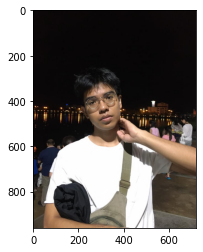

In [51]:
img = cv2.imread('/content/1111111111.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

22
Gender.male


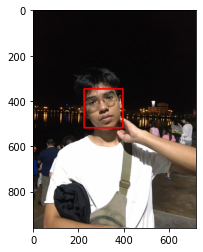

In [52]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left,tag.face_rectangle.top),
              (tag.face_rectangle.left+tag.face_rectangle.width, tag.face_rectangle.top+tag.face_rectangle.height), (0,0,255),5)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)